In [1]:
import mlx.core as mx
import mlx.nn as nn
import mlx.optimizers as optim

import numpy as np

In [2]:
class MLP(nn.Module):
    def __init__(
        self, num_layers: int, input_dim: int, hidden_dim: int, output_dim: int
    ):
        super().__init__()
        layer_sizes = [input_dim] + [hidden_dim] * num_layers + [output_dim]
        self.layers = [
            nn.Linear(idim, odim)
            for idim, odim in zip(layer_sizes[:-1], layer_sizes[1:])
        ]

    def __call__(self, x):
        for l in self.layers[:-1]:
            x = mx.maximum(l(x), 0.0)
        return self.layers[-1](x)

In [3]:
def loss_fn(model, X, y):
    return mx.mean(nn.losses.cross_entropy(model(X), y))

In [4]:
def eval_fn(model, X, y):
    return mx.mean(mx.argmax(model(X), axis=1) == y)

In [5]:
num_layers = 2
hidden_dim = 32
num_classes = 10
batch_size = 256
num_epochs = 10
learning_rate = 1e-1

# Load the data
import mnist
train_images, train_labels, test_images, test_labels = map(
    mx.array, mnist.mnist()
)

In [6]:
def batch_iterate(batch_size, X, y):
    perm = mx.array(np.random.permutation(y.size))
    for s in range(0, y.size, batch_size):
        ids = perm[s : s + batch_size]
        yield X[ids], y[ids]

In [7]:
# Load the model
model = MLP(num_layers, train_images.shape[-1], hidden_dim, num_classes)
mx.eval(model.parameters())

# Get a function which gives the loss and gradient of the
# loss with respect to the model's trainable parameters
loss_and_grad_fn = nn.value_and_grad(model, loss_fn)

# Instantiate the optimizer
optimizer = optim.SGD(learning_rate=learning_rate)

for e in range(num_epochs):
    for X, y in batch_iterate(batch_size, train_images, train_labels):
        loss, grads = loss_and_grad_fn(model, X, y)

        # Update the optimizer state and model parameters
        # in a single call
        optimizer.update(model, grads)

        # Force a graph evaluation
        mx.eval(model.parameters(), optimizer.state)

    accuracy = eval_fn(model, test_images, test_labels)
    print(f"Epoch {e}: Test accuracy {accuracy.item():.3f}")

Epoch 0: Test accuracy 0.875
Epoch 1: Test accuracy 0.908
Epoch 2: Test accuracy 0.915
Epoch 3: Test accuracy 0.926
Epoch 4: Test accuracy 0.934
Epoch 5: Test accuracy 0.938
Epoch 6: Test accuracy 0.943
Epoch 7: Test accuracy 0.948
Epoch 8: Test accuracy 0.949
Epoch 9: Test accuracy 0.948


4.6s to run 10 epochs

In [12]:
test_img = train_images[5690]
test_img=test_img.reshape([28,-1])

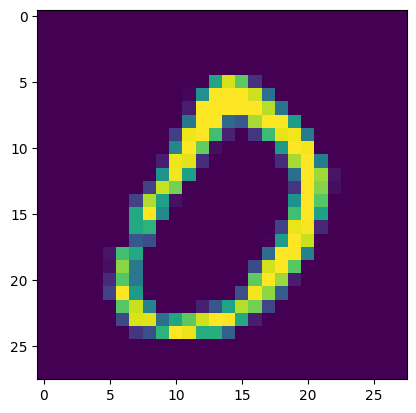

In [13]:
import matplotlib.pyplot as plt 
plt.imshow(test_img)

In [15]:
mx.predict(test_img)

AttributeError: module 'mlx.core' has no attribute 'predict'